In [119]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Conspecific_Tracking_ta_edit_117 as cs
from scipy import interpolate 
from scipy import misc
from beating import rotation
from beating import tail_spline
from functions import *
from hmmlearn import hmm

In [6]:
path = "/Users/ryan/Desktop/Fish Project/Scripts/top example.h5"
f = pd.HDFStore(path,'r')
df = f.get('df_with_missing')
df.columns = df.columns.droplevel()

In [53]:
path = "/Users/ryan/Desktop/Fish Project/Scripts/IM1_IM2Fish1_AN.h5"
f = pd.HDFStore(path,'r')
df = f.get('df_with_missing')
df.columns = df.columns.droplevel()

- Add the midpoint of spine1-spine2, and spine2-spine3 to the data, since these points are relatively stable

In [199]:
def midpoint_wLikelihood (x1, y1, l1,x2, y2,l2):
    '''
    give definition x1: x-value object 1, y1: y-value object 1, x2: x-value object 2
    y2: y-value object 2, l1: likelihood object 1,l2:likelihood object 2
    '''
    midpointx = (x1 + x2)/2
    midpointy = (y1 + y2)/2
    MinLikelihood=np.minimum(l1,l2) #the likelihood is set to the minimum of 2 columns

    return list(zip(midpointx, midpointy,MinLikelihood))
mid_spine1_spine2=midpoint_wLikelihood(df['F_spine1']['x'],df['F_spine1']['y'],df['F_spine1']['likelihood'],
df['G_spine2']['x'],df['G_spine2']['y'],df['G_spine2']['likelihood'])
name_arr=[["mid_spine1_spine2","mid_spine1_spine2","mid_spine1_spine2"], ['x', 'y', 'likelihood']]
mid_spine1_spine2=pd.DataFrame(mid_spine1_spine2,columns=pd.MultiIndex.from_arrays(name_arr,names=["bodyparts",'coords']))
df=pd.concat([df,mid_spine1_spine2],axis=1)
mid_spine2_spine3=midpoint_wLikelihood(df['G_spine2']['x'],df['G_spine2']['y'],df['G_spine2']['likelihood'],
df['H_spine3']['x'],df['H_spine3']['y'],df['H_spine3']['likelihood'])
name_arr=[["mid_spine2_spine3","mid_spine2_spine3","mid_spine2_spine3"], ['x', 'y', 'likelihood']]
mid_spine2_spine3=pd.DataFrame(mid_spine2_spine3,columns=pd.MultiIndex.from_arrays(name_arr,names=["bodyparts",'coords']))
df=pd.concat([df,mid_spine2_spine3],axis=1)

In [60]:
df

bodyparts      A_head                        B_rightoperculum              \
coords              x           y likelihood                x           y   
0          404.027093  452.784061   0.852759       373.022540  444.478813   
1          409.518258  456.168237   0.707424       380.564633  441.452493   
2          416.021131  458.829014   0.961976       375.544293  480.243133   
3          418.631109  453.482942   0.982594       387.867952  444.703797   
4          421.335677  451.632160   0.956995       390.454832  448.371751   
...               ...         ...        ...              ...         ...   
216057     454.722773   91.052952   0.952339       435.756619  116.377737   
216058     454.628947   91.101455   0.955438       435.809125  116.357512   
216059     454.536639   90.403741   0.968444       435.727972  116.350870   
216060     454.591377   90.354966   0.966241       435.700386  116.368899   
216061     454.590316   90.355517   0.966222       435.702942  116.365883   

bodyparts             C_tailbase                          D_tailtip  ...  \
coords    likelihood           x           y likelihood           x  ...   
0           0.898827  366.340892  366.570245   0.012727  356.585716  ...   
1           0.781821  394.509101  372.453632   0.006994  356.742660  ...   
2           0.501142  393.881430  448.856957   0.018521  357.793870  ...   
3           0.762118  388.696705  368.314038   0.100839  358.861617  ...   
4           0.760402  388.796438  363.615279   0.248557  358.092681  ...   
...              ...         ...         ...        ...         ...  ...   
216057      0.902728  349.312713  130.059851   0.845905  293.271772  ...   
216058      0.909237  348.938786  130.257468   0.819364  292.696003  ...   
216059      0.915851  348.234546  130.391335   0.776115  292.736385  ...   
216060      0.912059  348.577807  130.279379   0.796673  292.955782  ...   
216061      0.912195  348.519972  130.244574   0.806216  292.914691  ...   

bodyparts P_analtipfront Q_analtipback                         \
coords        likelihood             x           y likelihood   
0               0.311684    358.777468  430.076907   0.077405   
1               0.187931    379.410293  438.567945   0.076076   
2               0.066562    379.430927  435.709863   0.010116   
3               0.059814    397.905565  360.806030   0.059774   
4               0.085751    396.208801  343.524288   0.107860   
...                  ...           ...         ...        ...   
216057          0.104965    322.230580  129.084248   0.225373   
216058          0.100109    322.064978  129.228422   0.269291   
216059          0.063360    321.443579  128.814633   0.194231   
216060          0.061320    321.907184  128.610472   0.172509   
216061          0.060675    321.878386  128.588739   0.189287   

bodyparts mid_spine1_spine2                        mid_spine2_spine3  \
coords                    x           y likelihood                 x   
0                388.929353  431.401798   0.980375        380.819022   
1                379.083110  453.416878   0.764842        382.725111   
2                395.851326  430.717738   0.765746        381.984306   
3                401.424633  434.710852   0.832265        388.169311   
4                401.558075  427.993768   0.852663        388.490790   
...                     ...         ...        ...               ...   
216057           435.591285   98.314108   0.953452        425.101073   
216058           435.658395   98.227841   0.951701        425.186713   
216059           435.443078   97.974406   0.940846        425.050601   
216060           435.363786   98.101440   0.942513        424.975133   
216061           435.365599   98.100669   0.942513        424.978626   

bodyparts                         
coords              y likelihood  
0          417.608217   0.666796  
1          418.902142   0.842017  
2          416.257649   0.793391  
3          421.660739   0.832265  
4          415.2

In [76]:
#pd.set_option('display.max_columns', None)

In [61]:
focus_cols=['A_head',"F_spine1",'mid_spine1_spine2',"G_spine2",'mid_spine2_spine3',"H_spine3","I_spine4","J_spine5","K_spine6","L_spine7",'C_tailbase','D_tailtip']

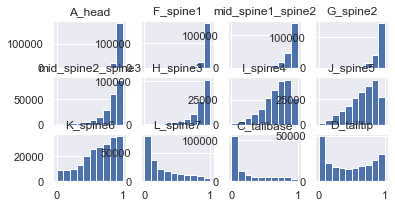

In [62]:
i=1
fig=plt.figure()
for cols in focus_cols:
    ax=fig.add_subplot(4, 4, i)
    ax.hist(df[cols]['likelihood'])
    ax.title.set_text(cols)
    i=i+1

- Assume the period with more stable operculum angle the fish is not moving a lot, and in this period the likelihood is significantly higher

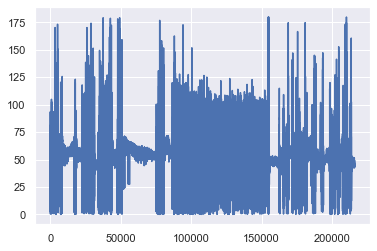

In [63]:
operculum=auto_scoring_get_opdeg(df)
operculum=operculum.fillna(method="ffill")
plt.plot(operculum)

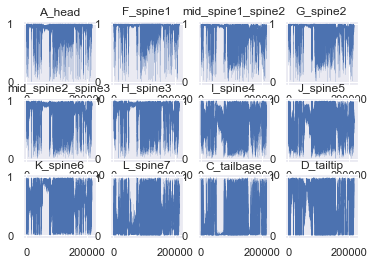

In [65]:
i=1
fig=plt.figure()
for cols in focus_cols:
    ax=fig.add_subplot(3, 4, i)
    ax.plot(df[cols]['likelihood'],linewidth=0.1)
    ax.title.set_text(cols)
    i=i+1

In [101]:
focus_df=df[['A_head',"F_spine1",'mid_spine1_spine2',"G_spine2",'mid_spine2_spine3',"H_spine3","I_spine4","J_spine5","K_spine6","L_spine7"]]

In [102]:
focus_df

bodyparts      A_head                           F_spine1              \
coords              x           y likelihood           x           y   
0          404.027093  452.784061   0.852759  392.453644  435.986002   
1          409.518258  456.168237   0.707424  372.850161  484.909383   
2          416.021131  458.829014   0.961976  404.984246  442.003148   
3          418.631109  453.482942   0.982594  408.209593  439.322407   
4          421.335677  451.632160   0.956995  411.102251  439.513704   
...               ...         ...        ...         ...         ...   
216057     454.722773   91.052952   0.952339  440.413999   96.314567   
216058     454.628947   91.101455   0.955438  440.470575   96.258808   
216059     454.536639   90.403741   0.968444  440.154905   95.934403   
216060     454.591377   90.354966   0.966241  440.078579   96.015912   
216061     454.590316   90.355517   0.966222  440.080176   96.015417   

bodyparts            mid_spine1_spine2                           G_spine2  \
coords    likelihood                 x           y likelihood           x   
0           0.980375        388.929353  431.401798   0.980375  385.405063   
1           0.764842        379.083110  453.416878   0.764842  385.316058   
2           0.765746        395.851326  430.717738   0.765746  386.718406   
3           0.856745        401.424633  434.710852   0.832265  394.639672   
4           0.922689        401.558075  427.993768   0.852663  392.013900   
...              ...               ...         ...        ...         ...   
216057      0.977373        435.591285   98.314108   0.953452  430.768571   
216058      0.977899        435.658395   98.227841   0.951701  430.846215   
216059      0.965566        435.443078   97.974406   0.940846  430.731251   
216060      0.964811        435.363786   98.101440   0.942513  430.648993   
216061      0.964766        435.365599   98.100669   0.942513  430.651021   

bodyparts                        mid_spine2_spine3                         \
coords              y likelihood                 x           y likelihood   
0          426.817594   0.985832        380.819022  417.608217   0.666796   
1          421.924372   0.991415        382.725111  418.902142   0.842017   
2          419.432327   0.935444        381.984306  416.257649   0.793391   
3          430.099297   0.832265        388.169311  421.660739   0.832265   
4          416.473833   0.852663        388.490790  415.223885   0.829690   
...               ...        ...               ...         ...        ...   
216057     100.313648   0.953452        425.101073  102.673196   0.947300   
216058     100.196875   0.951701        425.186713  102.629801   0.949257   
216059     100.014409   0.940846        425.050601  102.679574   0.940846   
216060     100.186967   0.942513        424.975133  102.779477   0.942513   
216061     100.185921   0.942513        424.978626  102.778600   0.942513   

bodyparts    H_spine3                           I_spine4              \
coords              x           y likelihood           x           y   
0          376.232981  408.398840   0.666796  367.640805  396.161988   
1          380.134164  415.879911   0.842017  370.964490  402.793842   
2          377.250206  413.082971   0.793391  369.630123  399.330933   
3          381.698949  413.222181   0.880452  375.718935  407.082873   
4          384.967681  413.973937   0.829690  375.804233  406.613817   
...               ...         ...        ...         ...         ...   
216057     419.433574  105.032744   0.947300  405.954556  112.055364   
216058     419.527210  105.062728   0.949257  406.047652  111.994422   
216059     419.369951  105.344739   0.952356  404.290255  111.079240   
216060     419.301272  105.371987   0.949187  404.125925  111.065230   
216061     419.306231  105.371279   0.948948  404.130111  111.060237   

bodyparts               J_spine5                           K_spine6  \
coords    likelihood           x           y likeli

In [24]:
def auto_scoring_tracefilter_spine(data,p=0.5,p0=20):
    #remove the not close to origin check(i don't know the meaning of it currently)
    mydata = data.copy()
    spine_column=['A_head',"F_spine1",'mid_spine1_spine2',"G_spine2",'mid_spine2_spine3',"H_spine3","I_spine4","J_spine5","K_spine6","L_spine7"]
    for i,c in enumerate(spine_column):
        #likelihood check
        likelihood_check=np.array(data[c]['likelihood']<p)
        mydata.loc[likelihood_check,(c,'x')]=np.nan
        mydata.loc[likelihood_check,(c,'y')]=np.nan
        #position difference check
        for j in ['x','y']:
            xdifference = abs(mydata[c][j].diff())
            xdiff_check = xdifference > p0     
            mydata[c][j][xdiff_check] = np.nan
        #head distance check
        if i==0:
            head_spine1=np.array([mydata['A_head']['x']-mydata['F_spine1']['x'],mydata['A_head']['y']-mydata['F_spine1']['y']]).T
            head_dist=np.sqrt(np.sum(head_spine1*head_spine1,axis=1))
            head_dist_check=head_dist>25 #assume normal, use 3 \sigma rule
            mydata.loc[head_dist_check,(c,'x')] = np.nan
            mydata.loc[head_dist_check,(c,'y')] = np.nan
        #angle check
         #use the line from spine1 to mid point of spine1,spine2 as baseline, any segment to fit the spline should not have a angle
            #with the base line larger than 75 degree.
        if i==2:
            baseline=np.array([mydata['mid_spine1_spine2']['x']-mydata['F_spine1']['x'],mydata['mid_spine1_spine2']['y']-mydata['F_spine1']['y']]).T
        if i>2:
            orientation1=np.array([mydata[spine_column[i]]['x']-mydata[spine_column[i-1]]['x'],mydata[spine_column[i]]['y']-mydata[spine_column[i-1]]['y']]).T
            orientation2=np.array([mydata[spine_column[i]]['x']-mydata[spine_column[i-2]]['x'],mydata[spine_column[i]]['y']-mydata[spine_column[i-2]]['y']]).T
            orientation3=np.array([mydata[spine_column[i]]['x']-mydata[spine_column[i-3]]['x'],mydata[spine_column[i]]['y']-mydata[spine_column[i-3]]['y']]).T
            mask=np.isnan(orientation1)           #if the previous point is already na, check the vector to the second closest point
            orientation=np.copy(orientation1)    # and if the second closest point is also nan, stop here
            orientation[mask]=orientation2[mask] 
            mask=np.isnan(orientation)
            orientation[mask]=orientation3[mask]
            inner_product =np.sum(baseline*orientation,axis=1)
            cos=inner_product/np.sqrt(np.sum(baseline*baseline,axis=1))/np.sqrt(np.sum(orientation*orientation,axis=1))
            angle=np.arccos(cos)/np.pi*180
            angle_check=np.logical_and(np.invert(np.isnan(angle)),angle>75)#if the baseline contains nan, skip this step
            mydata.loc[angle_check,(c,'x')]=np.nan
            mydata.loc[angle_check,(c,'y')]=np.nan
    orientation=-head_spine1
    inner_product =np.sum(baseline*orientation,axis=1)
    cos=inner_product/np.sqrt(np.sum(baseline*baseline,axis=1))/np.sqrt(np.sum(orientation*orientation,axis=1))
    angle=np.arccos(cos)/np.pi*180
    angle_check=np.logical_and(np.invert(np.isnan(angle)),angle>75)
    mydata.loc[angle_check,('A_head','x')]=np.nan
    mydata.loc[angle_check,('A_head','y')]=np.nan
    return mydata

In [40]:
duration=30
fps=40

In [105]:
filtered_df=auto_scoring_tracefilter_spine(focus_df,p=0.4,p0=20)

In [26]:
filtered_df

bodyparts      A_head                           F_spine1              \
coords              x           y likelihood           x           y   
0          415.946948  177.326215   0.959429  402.117967  169.631640   
1          418.014186  178.462459   0.955257  404.524377  169.371623   
2          417.105943  176.876360   0.943769  401.758686  168.063326   
3          416.606345  177.777748   0.985256  403.405886  169.828929   
4          419.273356  175.782816   0.969223  405.064807  168.083751   
...               ...         ...        ...         ...         ...   
216055     115.224273  428.042881   0.985239  128.737781  419.247331   
216056     112.109635  429.795300   0.948975  123.401674  420.254941   
216057     110.823496  428.584533   0.983084  121.570423  419.350646   
216058     107.593892  430.485992   0.988081  122.219878  419.492733   
216059     105.617214  428.754637   0.987205  120.416319  420.531976   

bodyparts            mid_spine1_spine2                           G_spine2  \
coords    likelihood                 x           y likelihood           x   
0           0.990565        396.602562  167.306902   0.917309  391.087156   
1           0.958527        398.827023  166.732320   0.958527  393.129669   
2           0.991442        397.285308  165.399387   0.988139  392.811929   
3           0.966785        398.035872  167.508148   0.966785  392.665857   
4           0.968280        400.009140  165.747495   0.968280  394.953472   
...              ...               ...         ...        ...         ...   
216055      0.954895        133.449618  416.788090   0.954895  138.161456   
216056      0.872805        129.620619  417.704251   0.872805  135.839563   
216057      0.911489        127.398001  417.278560   0.911489  133.225579   
216058      0.960786        127.524795  417.058163   0.954190  132.829713   
216059      0.975851        125.452665  418.128863   0.975851  130.489010   

bodyparts  ...   I_spine4    J_spine5                           K_spine6  \
coords     ... likelihood           x           y likelihood           x   
0          ...   0.578528  349.684359  157.182666   0.881372  340.210794   
1          ...   0.810888  351.241908  158.113331   0.801531  339.510600   
2          ...   0.765455  352.945591  156.552366   0.778212  341.330394   
3          ...   0.811939  353.972853  157.804147   0.748699  344.325541   
4          ...   0.796676  353.056999  157.798922   0.807415  335.645759   
...        ...        ...         ...         ...        ...         ...   
216055     ...   0.965109  175.838399  405.914538   0.939288  187.048685   
216056     ...   0.973968  170.652844  405.408761   0.959292         NaN   
216057     ...   0.962665  167.270219  403.866034   0.974614  182.053154   
216058     ...   0.914967  163.873253  402.849576   0.966033  175.408684   
216059     ...   0.883270  163.480219  401.121211   0.959810  172.687709   

bodyparts                           L_spine7                         
coords              y likelihood           x           y likelihood  
0          155.139323   0.957001  327.103442  150.012990   0.754444  
1          156.491164   0.642488  327.914603  153.556733   0.679507  
2          154.257235   0.704220  330.061170  150.368643   0.691900  
3          156.145835   0.438514         NaN         NaN   0.351731  
4          153.731922   0.439092  328.687830  152.187209   0.486498  
...               ...        ...         ...         ...        ...  
216055     403.223368   0.538393  201.811539  404.071829   0.417367  
216056            NaN   0.307889         NaN         NaN   0.093662  
216057     402.441072   0.505822         NaN         NaN   0.251699  
216058     400.563452   0.788096         NaN         NaN   0.266447  
216059     399.343552   0.456758  201.096396  399.972667   0.425077  

[216060 rows x 30 columns]

- sample output of the fitted spline

(0, 500)

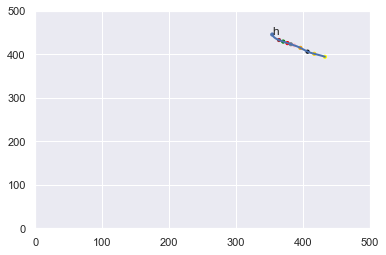

In [108]:
fig, ax = plt.subplots()
test_point = filtered_df.iloc[49580,:]
raw_test_point=focus_df.iloc[49580,:]
x = test_point[[0, 3, 6, 9, 12, 15,18,21,24,27]]
y = test_point[[1, 4, 7, 10, 13, 16,19,22,25,28]]
pts=np.vstack([x,y]).T
ox = raw_test_point[[0, 3, 6, 9, 12, 15,18,21,24,27]]
oy = raw_test_point[[1, 4, 7, 10, 13, 16,19,22,25,28]]
raw_pts=np.vstack([ox,oy]).T
pts=pts[~np.isnan(pts).any(axis=1)]
colormap = np.array(['b', 'brown', 'green','red','grey','pink','orange','black','gold','yellow'])
categories = np.array(range(raw_pts.shape[0]))
ax.scatter(raw_pts[:,0], raw_pts[:,1],s=10,c=colormap[categories])
ax.text(raw_pts[0,0],raw_pts[0,1],"h",fontsize=12)
if(pts.shape[0]>=4):
    tck,u=interpolate.splprep(pts.T, u=None, s=0.0) 
    u_new = np.linspace(u.min(), u.max(), 1000)
    x_new, y_new = interpolate.splev(u_new,tck, der=0)
    ax.plot(x_new, y_new, 'b-',linewidth=2)
ax.set_ylim([0,500])
ax.set_xlim([0,500])

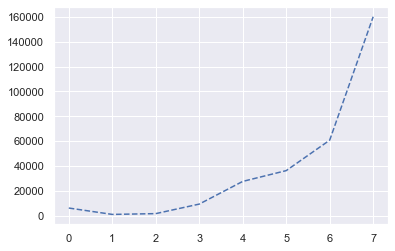

In [193]:
df1=filtered_df

plt.plot([df1[df1.isnull()["A_head"]['x']==True].shape[0],df1[df1.isnull()["F_spine1"]['x']==True].shape[0],
        df1[df1.isnull()["G_spine2"]['x']==True].shape[0],df1[df1.isnull()["H_spine3"]['x']==True].shape[0],
         df1[df1.isnull()["I_spine4"]['x']==True].shape[0],df1[df1.isnull()["J_spine5"]['x']==True].shape[0],
         df1[df1.isnull()["K_spine6"]['x']==True].shape[0],df1[df1.isnull()["L_spine7"]['x']==True].shape[0]],'b--')

In [ ]:
from moviepy.editor import VideoFileClip, VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

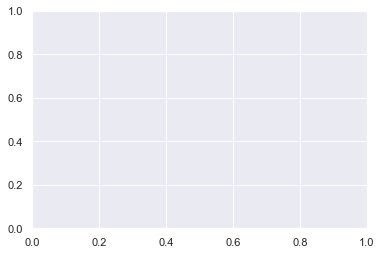

In [109]:
fig, ax = plt.subplots()
def make_frame(time):
    t=np.int(49000+time*fps)
    ax.clear()
    test_point = filtered_df.iloc[t,:]
    raw_test_point=focus_df.iloc[t,:]
    x = test_point[[0, 3, 6, 9, 12, 15,18,21,24,27]]
    y = test_point[[1, 4, 7, 10, 13, 16,19,22,25,28]]
    pts=np.vstack([x,y]).T
    ox = raw_test_point[[0, 3, 6, 9, 12, 15,18,21,24,27]]
    oy = raw_test_point[[1, 4, 7, 10, 13, 16,19,22,25,28]]
    raw_pts=np.vstack([ox,oy]).T
    pts=pts[~np.isnan(pts).any(axis=1)]
    colormap = np.array(['b', 'brown', 'green','red','grey','pink','orange','black','gold','yellow'])
    categories = np.array(range(raw_pts.shape[0]))
    ax.scatter(raw_pts[:,0], raw_pts[:,1],s=10,c=colormap[categories])
    ax.text(raw_pts[0,0],raw_pts[0,1],"h",fontsize=12)
    if(pts.shape[0]>=4):
        tck,u=interpolate.splprep(pts.T, u=None, s=0.0) 
        u_new = np.linspace(u.min(), u.max(), 1000)
        x_new, y_new = interpolate.splev(u_new, tck, der=0)
        ax.plot(x_new, y_new, 'b-',linewidth=2)
    ax.set_ylim([0,500])
    ax.set_xlim([0,500])
    ax.grid(b=None)
    ax.patch.set_facecolor('white')
    ax.axis("off")
    return mplfig_to_npimage(fig)

In [ ]:
animation = VideoClip(make_frame, duration = duration)
animation.write_videofile("spline_IM1_IM2.mp4", fps=40)

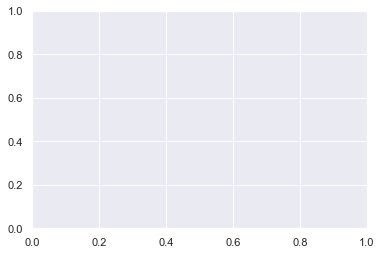

In [114]:
fig, ax = plt.subplots()
def make_frame_pts(time):
    t=np.int(49000+time*fps)
    ax.clear()
    test_point = filtered_df.iloc[t,:]
    x = test_point[[0, 3, 6, 9, 12, 15,18,21,24,27]]
    y = test_point[[1, 4, 7, 10, 13, 16,19,22,25,28]]
    pts=np.vstack([x,y]).T
    colormap = np.array(['b', 'brown', 'green','red','grey','pink','orange','black','gold','yellow'])
    categories = np.array(range(10))[~np.isnan(pts).any(axis=1)]
    pts=pts[~np.isnan(pts).any(axis=1)]
    ax.scatter(pts[:,0], pts[:,1],s=10,c=colormap[categories])
    ax.set_ylim([0,500])
    ax.set_xlim([0,500])
    ax.grid(b=None)
    ax.patch.set_facecolor('white')
    ax.axis("off")
    return mplfig_to_npimage(fig)

In [115]:
animation = VideoClip(make_frame, duration = duration)
animation.write_videofile("spline_IM1_IM2_pts.mp4", fps=40)

t:   0%|          | 4/1200 [00:00<00:43, 27.57it/s, now=None]

Moviepy - Building video spline_IM1_IM2_pts.mp4.
Moviepy - Writing video spline_IM1_IM2_pts.mp4



Moviepy - Done !
Moviepy - video ready spline_IM1_IM2_pts.mp4


In [120]:
df=auto_scoring_tracefilter(df)
operculum=auto_scoring_get_opdeg(df)
operculum=operculum.fillna(method="ffill")
operculum=operculum[49000:50200]
ori=orientation(df)
ori=pd.Series(ori).fillna(method='ffill')
ori=ori[49000:50200]

In [179]:
#compute the curvature for every point used to fit the spline
curvatures=[]
for i in range(49000,50200):
    test_point=filtered_df.iloc[i,:]
    y=test_point[[1,4,7,10,13,16,19,22,25,28]]
    x=test_point[[0,3,6,9,12,15,18,21,24,27]]
    pts=np.vstack([x,y]).T
    index=~np.isnan(pts).any(axis=1)
    pts=pts[index]
    curvature=np.repeat(np.nan,10)
    if(pts.shape[0]>=4):
        tck,u=interpolate.splprep(pts.T, u=None, s=0.0)
        dx1,dy1=interpolate.splev(u,tck,der=1)
        dx2,dy2=interpolate.splev(u,tck,der=2)
        k=(dx1*dy2-dy1*dx2)/np.power((np.square(dx1)+np.square(dy1)),3/2)
        curvature[index]=k
        curvatures.append(curvature)
    else:
        curvatures.append(curvature)

In [180]:
#I know it's redundant...
curvatures=np.array(curvatures)
curvatures=np.vstack(curvatures)
curvatures=pd.DataFrame(curvatures)
curvatures=curvatures.fillna(curvatures.mean())

- I did a kmeans to the curvature data, and use the predicted label to color the scatter plot of operculum and orientation, it looks like it captures one of the clusters.

In [197]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=1000, n_init=10)
kmeans.fit(curvatures)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'curvature filters out the region where fish is aggressive and face towards the glass')

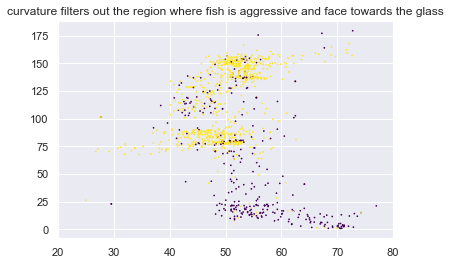

In [198]:
labels=kmeans.predict(curvatures)
plt.scatter(x=operculum,y=ori,s=0.5, c=labels, cmap='viridis')
plt.xlim(20,80)
plt.title('curvature filters out the region where fish is aggressive and face towards the glass')
#use n_clusters=2 also filters out the bottom area
#currently no idea how to improve it 